In [140]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [141]:
df_train=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
df1=df_train.copy()
dftest1=df_test.copy()

In [142]:
df1.shape


(1460, 81)

In [143]:
dftest1.shape

(1459, 80)

In [144]:
df=pd.concat([df1,dftest1],axis=0)

In [145]:
df.shape

(2919, 81)

In [146]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

# Visualising missing Data

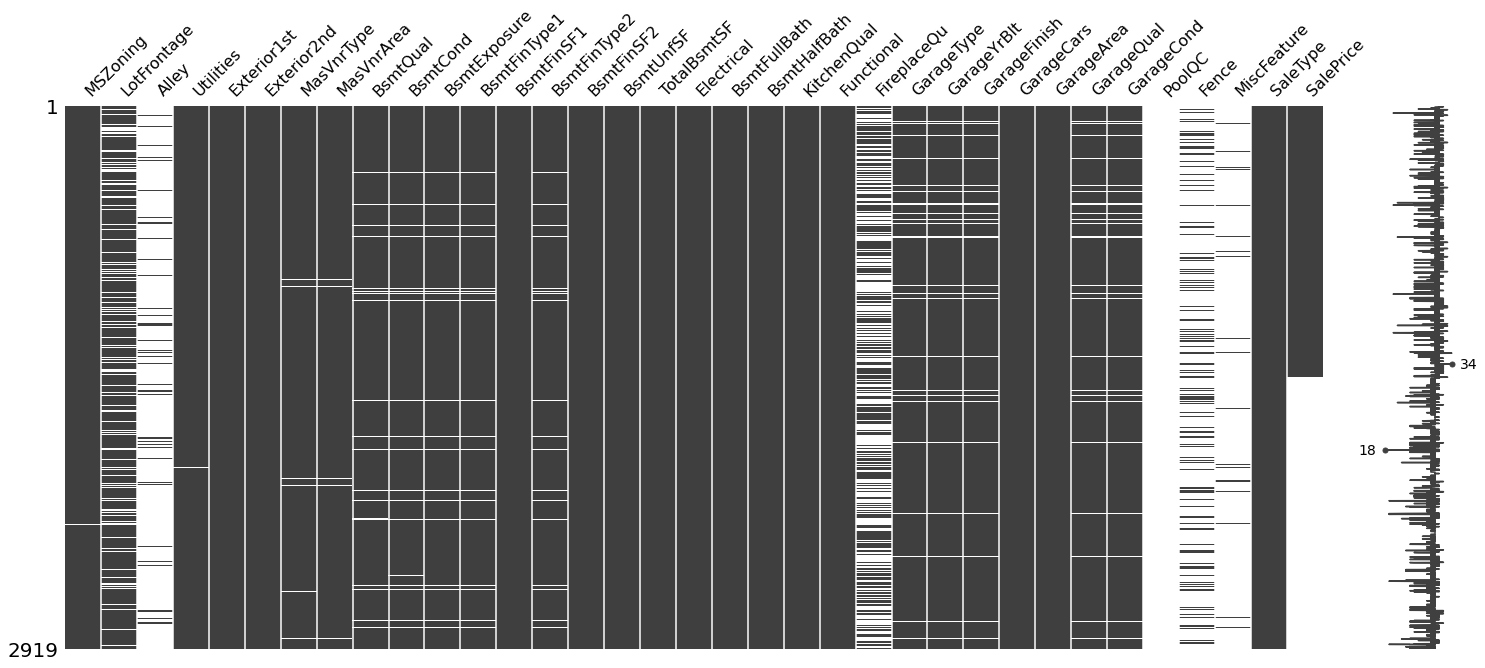

In [147]:
miss_columns=df.columns[df.isnull().any()]

#msno.bar(df[miss_columns])
msno.matrix(df[miss_columns])
#sns.heatmap(df[miss_columns].isnull(), cbar=False)
#sns.barplot(x=miss_columns,y=df[miss_columns].isnull().sum())

In [148]:
df.drop(columns=['Alley','PoolQC','MiscFeature','Fence','FireplaceQu'],inplace=True)

In [149]:
miss_columns=df.columns[df.isnull().any()]
df[miss_columns].isnull().sum()

MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
SaleType           1
SalePrice       1459
dtype: int64

# Dividing categorical columns and numeric columns

In [150]:
catcolumns=df.select_dtypes(include=['object']).columns
numcolumns=[x for x in df.columns if x not in catcolumns]
numcolumns.remove('SalePrice')
misscatcolumns=list(df[catcolumns].columns[df[catcolumns].isnull().any()])
missnumcolumns=[x for x in miss_columns if x not in misscatcolumns]
missnumcolumns.remove('SalePrice')
print(misscatcolumns)
print(missnumcolumns)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [151]:
df[missnumcolumns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   2433 non-null   float64
 1   MasVnrArea    2896 non-null   float64
 2   BsmtFinSF1    2918 non-null   float64
 3   BsmtFinSF2    2918 non-null   float64
 4   BsmtUnfSF     2918 non-null   float64
 5   TotalBsmtSF   2918 non-null   float64
 6   BsmtFullBath  2917 non-null   float64
 7   BsmtHalfBath  2917 non-null   float64
 8   GarageYrBlt   2760 non-null   float64
 9   GarageCars    2918 non-null   float64
 10  GarageArea    2918 non-null   float64
dtypes: float64(11)
memory usage: 273.7 KB


In [152]:
df[misscatcolumns]

,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType
0,RL,AllPub,VinylSd,VinylSd,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD
1,RL,AllPub,MetalSd,MetalSd,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Typ,Attchd,RFn,TA,TA,WD
2,RL,AllPub,VinylSd,VinylSd,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD
3,RL,AllPub,Wd Sdng,Wd Shng,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,WD
4,RL,AllPub,VinylSd,VinylSd,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,AllPub,CemntBd,CmentBd,None,TA,TA,No,Unf,Unf,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,WD
1455,RM,AllPub,CemntBd,CmentBd,None,TA,TA,No,Rec,Unf,SBrkr,TA,Typ,CarPort,Unf,TA,TA,WD
1456,RL,AllPub,VinylSd,VinylSd,None,TA,TA,No,ALQ,Unf,SBrkr,TA,Typ,Detchd,Unf,TA,TA,WD
1457,RL,AllPub,HdBoard,Wd Shng,None,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,WD


In [153]:
df[misscatcolumns].isnull().sum()

MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
BsmtQual         81
BsmtCond         82
BsmtExposure     82
BsmtFinType1     79
BsmtFinType2     80
Electrical        1
KitchenQual       1
Functional        2
GarageType      157
GarageFinish    159
GarageQual      159
GarageCond      159
SaleType          1
dtype: int64

# Filling missing Categorical data  with freq

In [154]:
"""
df.fillna(df['MSZoning'].value_counts().index[0],inplace=True)
df.fillna(df['Utilities'].value_counts().index[0],inplace=True)
df.fillna(df['Exterior2nd'].value_counts().index[0],inplace=True)
df.fillna(df['Exterior1st'].value_counts().index[0],inplace=True)
df.fillna(df['MasVnrType'].value_counts().index[0],inplace=True)
df.fillna(df['BsmtQual'].value_counts().index[0],inplace=True)
df.fillna(df['BsmtCond'].value_counts().index[0],inplace=True)
df.fillna(df['BsmtExposure'].value_counts().index[0],inplace=True)
df.fillna(df['BsmtFinType1'].value_counts().index[0],inplace=True)
df.fillna(df['BsmtFinType2'].value_counts().index[0],inplace=True)
df.fillna(df['Electrical'].value_counts().index[0],inplace=True)
df.fillna(df['KitchenQual'].value_counts().index[0],inplace=True)
df.fillna(df['Functional'].value_counts().index[0],inplace=True)
df.fillna(df['GarageType'].value_counts().index[0],inplace=True)
df.fillna(df['GarageFinish'].value_counts().index[0],inplace=True)
df.fillna(df['GarageQual'].value_counts().index[0],inplace=True)
df.fillna(df['GarageCond'].value_counts().index[0],inplace=True)
df.fillna(df['SaleType'].value_counts().index[0],inplace=True)"""

for x in misscatcolumns:
    print(x)
    df[x].fillna(df[x].value_counts().index[0],inplace=True)

MSZoning
Utilities
Exterior1st
Exterior2nd
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
SaleType


In [155]:
df[misscatcolumns].isnull().sum()

MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64

In [156]:
df[missnumcolumns].isnull().sum()

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

## FILLING NUMERIC MISSING VALUES WITH MEAN

In [157]:
for x in missnumcolumns:
    print(x)
    df[x].fillna(df[x].mean(),inplace=True)

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea


In [158]:
df[missnumcolumns].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

# EDA

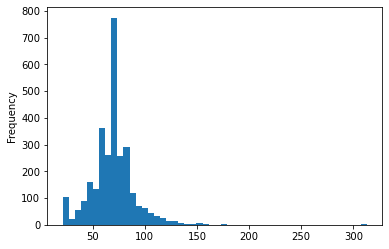

In [159]:
df['LotFrontage'].plot(kind='hist',bins=50)

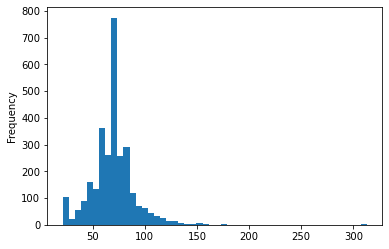

In [160]:
df['LotFrontage'].plot(kind='hist',bins=50)

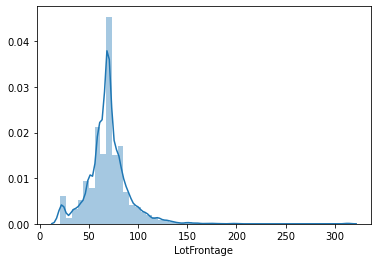

In [161]:
sns.distplot(df['LotFrontage'])

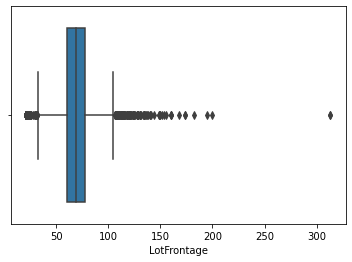

In [162]:
sns.boxplot(df['LotFrontage'])

In [163]:
df['LotFrontage'].mean()

69.30579531442702

In [164]:
df['LotFrontage'].median()

69.30579531442663

## PAIRPLOT

In [165]:
#sns.pairplot(df[missnumcolumns])

## LOG Transformation for right skewed data

In [166]:
df[missnumcolumns]=np.log10(np.array(1+df[missnumcolumns]))

In [167]:
#sns.pairplot(df[missnumcolumns])

In [168]:

df[numcolumns].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,1.819544,8450,7,5,2003,2003,2.294466,2.849419,...,2.739572,0,61,0,0,0,0,0,2,2008
1,2,20,1.908485,9600,6,8,1976,1976,0.000000,2.990783,...,2.663701,298,0,0,0,0,0,0,5,2007
2,3,60,1.838849,11250,7,5,2001,2002,2.212188,2.687529,...,2.784617,0,42,0,0,0,0,0,9,2008
3,4,70,1.785330,9550,7,5,1915,1970,0.000000,2.336460,...,2.808211,0,35,272,0,0,0,0,2,2006
4,5,60,1.929419,14260,8,5,2000,2000,2.545307,2.816904,...,2.922725,192,84,0,0,0,0,0,12,2008


In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = df[numcolumns].columns
vif["VIF"]=[variance_inflation_factor(df[numcolumns].values, i) for i in range(df[numcolumns].shape[1])]
vif

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Id,4.134770e+00
1,MSSubClass,5.347443e+00
2,LotFrontage,3.113179e+02
3,LotArea,3.419473e+00
4,OverallQual,6.165166e+01
5,OverallCond,4.060690e+01
6,YearBuilt,2.072522e+04
7,YearRemodAdd,2.200439e+04
8,MasVnrArea,2.358442e+00
9,BsmtFinSF1,6.457596e+00


# converting categorical features to numeric

In [170]:
df[catcolumns].shape

(2919, 38)

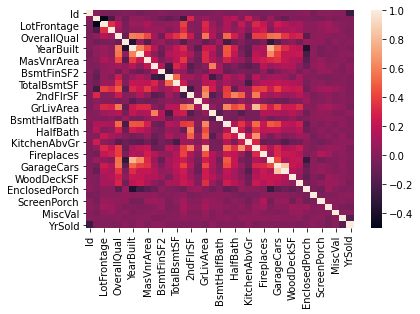

In [171]:
sns.heatmap(df[numcolumns].corr())

In [172]:
a=0
for x in df[catcolumns]:
    
    a=a+len(df[x].value_counts())
print(a)

234


# One hot encoding

In [173]:
df.shape

(2919, 76)

In [174]:
df_dummies=pd.get_dummies(df[catcolumns],drop_first=True)
df_dummies.shape

(2919, 196)

In [175]:
df=pd.concat([df,df_dummies],axis=1)
df.drop(columns=catcolumns,inplace=True)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,1.819544,8450,7,5,2003,2003,2.294466,2.849419,...,0,0,0,0,1,0,0,0,1,0
1,2,20,1.908485,9600,6,8,1976,1976,0.000000,2.990783,...,0,0,0,0,1,0,0,0,1,0
2,3,60,1.838849,11250,7,5,2001,2002,2.212188,2.687529,...,0,0,0,0,1,0,0,0,1,0
3,4,70,1.785330,9550,7,5,1915,1970,0.000000,2.336460,...,0,0,0,0,1,0,0,0,0,0
4,5,60,1.929419,14260,8,5,2000,2000,2.545307,2.816904,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.342423,1936,4,7,1970,1970,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
1455,2916,160,1.342423,1894,4,5,1970,1970,0.000000,2.403121,...,0,0,0,0,1,0,0,0,0,0
1456,2917,20,2.206826,20000,5,7,1960,1996,0.000000,3.088136,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,1.799341,10441,5,5,1992,1992,0.000000,2.528917,...,0,0,0,0,1,0,0,0,1,0


In [176]:
"""from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = df.columns
vif["VIF"]=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif"""

'from statsmodels.stats.outliers_influence import variance_inflation_factor\n\nvif = pd.DataFrame()\nvif["variables"] = df.columns\nvif["VIF"]=[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]\nvif'

In [177]:
df_test=np.split(df,[1460],axis=0)[1]
df=np.split(df,[1460],axis=0)[0]

In [178]:
df.drop(columns=['SalePrice'],inplace=True)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,1.819544,8450,7,5,2003,2003,2.294466,2.849419,...,0,0,0,0,1,0,0,0,1,0
1,2,20,1.908485,9600,6,8,1976,1976,0.000000,2.990783,...,0,0,0,0,1,0,0,0,1,0
2,3,60,1.838849,11250,7,5,2001,2002,2.212188,2.687529,...,0,0,0,0,1,0,0,0,1,0
3,4,70,1.785330,9550,7,5,1915,1970,0.000000,2.336460,...,0,0,0,0,1,0,0,0,0,0
4,5,60,1.929419,14260,8,5,2000,2000,2.545307,2.816904,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1.799341,7917,6,5,1999,2000,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,1.934498,13175,6,6,1978,1988,2.079181,2.898176,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,1.826075,9042,7,9,1941,2006,0.000000,2.440909,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,1.838849,9717,5,6,1950,1996,0.000000,1.698970,...,0,0,0,0,1,0,0,0,1,0


In [179]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(df)

In [180]:
df=pd.DataFrame(df)

In [181]:
df_test.drop(columns=['SalePrice'],inplace=True)
df_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,1.908485,11622,5,6,1961,1961,0.000000,2.671173,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,1.913814,14267,6,6,1958,1958,2.037426,2.965672,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,1.875061,13830,5,5,1997,1998,0.000000,2.898725,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,1.897627,9978,6,6,1998,1998,1.322219,2.780317,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,1.643453,5005,8,5,1992,1992,0.000000,2.421604,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.342423,1936,4,7,1970,1970,0.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
1455,2916,160,1.342423,1894,4,5,1970,1970,0.000000,2.403121,...,0,0,0,0,1,0,0,0,0,0
1456,2917,20,2.206826,20000,5,7,1960,1996,0.000000,3.088136,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,1.799341,10441,5,5,1992,1992,0.000000,2.528917,...,0,0,0,0,1,0,0,0,1,0


In [182]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_test=sc.fit_transform(df_test)
df_test=pd.DataFrame(df_test)

In [183]:
x=df.iloc[:,:].values
y=df_train.iloc[:,-1].values

# TEST/TRAIN SPLIT

In [184]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=42)


# MODELING

In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = -cross_val_score(lin_reg, x,y,cv = cv, scoring = 'neg_mean_absolute_error')
print (scores.mean())

1028113451990037.0


In [186]:
#importing libraries of all models
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lasso.fit(xtrain,ytrain)
ENet.fit(xtrain,ytrain)
KRR.fit(xtrain,ytrain)
GBoost.fit(xtrain,ytrain)
#model_xgb.fit(xtrain,ytrain)
model_lgb.fit(xtrain,ytrain)


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='regression')

In [187]:
from sklearn.metrics import mean_squared_error

print('MSE linear regression: ', mean_squared_error(ytest, model_lgb.predict(xtest)))
print('MSE Gradient Boosting Regressor : ', mean_squared_error(ytest, lasso.predict(xtest)))

MSE linear regression:  742651531.2340361
MSE Gradient Boosting Regressor :  2059712623.4899569


In [188]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x)
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

# Evaluating model

## MEAN SQUARE ERROR 

In [189]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#score = rmsle_cv(model_xgb)
#print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))



Lasso score: 38337.9736 (13814.3078)

ElasticNet score: 38268.3137 (13735.3112)

Kernel Ridge score: 29861.0249 (12570.2870)

Gradient Boosting score: 25904.0589 (8190.1357)

LGBM score: 26138.7822 (6957.3398)



## R2SCORE(Close to 1 is good)

In [190]:
from sklearn.metrics import r2_score


ypred=lasso.predict(xtest)
print("\nLasso r2score: {:.4f} \n".format(r2_score(ypred,ytest)))
     
    
ypred=ENet.predict(xtest)
print("ElasticNet r2score: {:.4f} \n".format(r2_score(ypred,ytest)))
      
ypred=KRR.predict(xtest)
print("Kernel Ridge r2score: {:.4f} \n".format(r2_score(ypred,ytest)))
      
ypred=GBoost.predict(xtest)
print("Gradient r2Boosting score: {:.4f} \n".format(r2_score(ypred,ytest)))
      
#ypred=model_xgb.predict(xtest)
#print("Xgboost r2score: {:.4f} \n".format(r2_score(ypred,ytest)))
      
ypred=model_lgb.predict(xtest)
print("LGBM r2score: {:.4f}\n" .format(r2_score(ypred,ytest)))





Lasso r2score: 0.7271 

ElasticNet r2score: 0.7283 

Kernel Ridge r2score: 0.8873 

Gradient r2Boosting score: 0.8699 

LGBM r2score: 0.8783



In [191]:
## FORMING SUBMISSION FILE
id=dftest1['Id']
ypred=GBoost.predict(df_test)
dict={'ID':id,'SalePrice':ypred}
dfsub=pd.DataFrame(dict)
dfsub.to_csv('./submission.csv', index=False)